In [25]:
import os

import pandas               as pd 
import numpy                as np 
import seaborn              as sns 
import matplotlib.pyplot    as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

In [2]:
file_path = os.path.dirname(os.getcwd())

hour    = pd.read_csv(file_path + r'\Dados\hour_tratado.csv')

hour.head()

,hr,workingday,temp,casual,registered,weathersit_2,weathersit_3,season_2,season_3,season_4
0,18,0,0.20,11,56,False,False,False,False,False
1,8,0,0.46,24,101,False,False,False,False,True
2,21,0,0.62,66,156,False,False,False,False,True
3,2,0,0.24,0,14,False,False,False,False,False
4,11,0,0.50,120,201,False,False,True,False,False


In [3]:

X, y_c, y_r = hour.drop(columns=["casual", "registered"]), hour["casual"], hour["registered"]

random_state = 0
# random state é EXENCIALLL
X_train, X_test, y_c_train, y_c_test = train_test_split(X, y_c, test_size=0.2, random_state=random_state)
_, _, y_r_train, y_r_test = train_test_split(X, y_r, test_size=0.2, random_state=random_state)

# Modelo base
xgb = XGBRegressor(objective="reg:squarederror", 
                    random_state=random_state,
                    tree_method='gpu_hist',  # Usar GPU para o histograma
                    gpu_id=0,                 # Usar a primeira GPU (se houver mais de uma, pode alterar)
                    predictor='gpu_predictor' # Usar o preditor da GPU
)

In [4]:
# Hiperparâmetros para busca
param_grid = {
    'n_estimators': list(range(1, 501, 20)),  # Intervalos de 50, de 50 a 500
    'max_depth': list(range(2, 31, 2)),  # Intervalos de 2, de 2 a 20
    'learning_rate': np.linspace(0.01, 0.3, 14).tolist(),  # 7 valores uniformemente espaçados entre 0.01 e 0.3
    'subsample': np.linspace(0.3, 1.0, 14).tolist(),  # 6 valores uniformemente espaçados entre 0.5 e 1.0
    'colsample_bytree': np.linspace(0.3, 1.0, 14).tolist(),  # 6 valores uniformemente espaçados entre 0.5 e 1.0
    'gamma': np.linspace(0.0, 0.3, 14).tolist(),  # 7 valores uniformemente espaçados entre 0.0 e 0.3
    'min_child_weight': list(range(1, 51, 5))  # Intervalos de 5, de 1 a 50
}

# RandomizedSearchCV
random_search_1 = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=500,  # Número de combinações testadas
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    random_state=random_state,
    n_jobs=-1
)

random_search_2 = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=500,  # Número de combinações testadas
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    random_state=random_state,
    n_jobs=-1
)

In [5]:

# Ajustar o modelo
random_search_1.fit(X_train, y_c_train)


Fitting 3 folds for each of 500 candidates, totalling 1500 fits


c:\Users\laraj\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:04:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:45: `gpu_id` is deprecated since2.0.0, use `device` instead. E.g. device=cpu/cuda/cuda:0
  warnings.warn(smsg, UserWarning)
c:\Users\laraj\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:04:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
c:\Users\laraj\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:04:26] WARNING: C:\buildki

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=0,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learn...
                                                         281, 301, 321, 341,
                                                         361, 381, 401, 421,
                                                         441, 461, 481],
                                        'subsample': [0.3, 0.3538461538461538,
                                                      0.4076923076923077,
                                                      0.4615384615384615,
                                                      0.5153846153846153,
                                                      0.5692307692307692,
                                                      0.6230769230769231,
                                                      0.676923076923077,
                                                      0.7307692307692307,
                                                      0.7846153846153845,
                                                      0.8384615384615384,
                                                      0.8923076923076922,
                                                      0.9461538461538461,
                                                      1.0]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=2)

In [6]:
random_search_2.fit(X_train, y_r_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


c:\Users\laraj\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:56:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
c:\Users\laraj\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:56:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=0,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learn...
                                                         281, 301, 321, 341,
                                                         361, 381, 401, 421,
                                                         441, 461, 481],
                                        'subsample': [0.3, 0.3538461538461538,
                                                      0.4076923076923077,
                                                      0.4615384615384615,
                                                      0.5153846153846153,
                                                      0.5692307692307692,
                                                      0.6230769230769231,
                                                      0.676923076923077,
                                                      0.7307692307692307,
                                                      0.7846153846153845,
                                                      0.8384615384615384,
                                                      0.8923076923076922,
                                                      0.9461538461538461,
                                                      1.0]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=2)

In [7]:
results = pd.DataFrame(random_search_1.cv_results_)

# Ordenar os resultados pelos scores (do melhor para o pior)
results_sorted = results.sort_values(by="mean_test_score", ascending=False)

# Mostrar os 5 melhores resultados
results_sorted.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,param_gamma,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
445,73.593570,0.441746,0.477281,0.142931,1.000000,221,6,16,0.032308,0.115385,0.838462,"{'subsample': 1.0, 'n_estimators': 221, 'min_c...",-425.536770,-422.396490,-445.554858,-431.162706,10.257221,1
100,13.805900,1.218945,0.250271,0.159297,0.946154,61,11,12,0.121538,0.138462,0.946154,"{'subsample': 0.9461538461538461, 'n_estimator...",-426.375765,-431.767160,-454.192181,-437.445035,12.044831,2
59,41.398598,0.467827,0.563395,0.199758,1.000000,141,21,16,0.121538,0.184615,0.892308,"{'subsample': 1.0, 'n_estimators': 141, 'min_c...",-437.075221,-426.524970,-453.596320,-439.065503,11.141078,3
374,39.263688,2.412684,0.030323,0.003715,0.569231,201,6,12,0.054615,0.046154,0.784615,"{'subsample': 0.5692307692307692, 'n_estimator...",-436.438076,-430.094614,-451.129022,-439.220571,8.809778,4
300,23.090211,0.290820,0.418591,0.364687,0.784615,161,6,10,0.099231,0.230769,0.784615,"{'subsample': 0.7846153846153845, 'n_estimator...",-436.620744,-432.172490,-450.818947,-439.870727,7.951703,5


In [8]:
results = pd.DataFrame(random_search_2.cv_results_)

# Ordenar os resultados pelos scores (do melhor para o pior)
results_sorted = results.sort_values(by="mean_test_score", ascending=False)

# Mostrar os 5 melhores resultados
results_sorted.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,param_gamma,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
205,22.111394,0.032162,0.142382,0.001348,0.892308,401,11,6,0.099231,0.207692,1.000000,"{'subsample': 0.8923076923076922, 'n_estimator...",-3271.223351,-3500.453585,-3381.183872,-3384.286936,93.608571,1
100,11.510702,0.228787,0.051507,0.000605,0.946154,61,11,12,0.121538,0.138462,0.946154,"{'subsample': 0.9461538461538461, 'n_estimator...",-3270.640330,-3481.226606,-3423.593461,-3391.820132,88.858701,2
254,9.026891,0.102502,0.059746,0.009027,0.676923,61,6,10,0.143846,0.161538,0.892308,"{'subsample': 0.676923076923077, 'n_estimators...",-3279.448007,-3520.412259,-3425.252796,-3408.371021,99.094865,3
445,72.296874,0.579942,0.666438,0.089523,1.000000,221,6,16,0.032308,0.115385,0.838462,"{'subsample': 1.0, 'n_estimators': 221, 'min_c...",-3284.847076,-3473.575265,-3479.189199,-3412.537180,90.319622,4
59,25.715705,0.479108,0.078393,0.005217,1.000000,141,21,16,0.121538,0.184615,0.892308,"{'subsample': 1.0, 'n_estimators': 141, 'min_c...",-3267.160082,-3521.701930,-3469.927022,-3419.596345,109.841616,5


In [28]:
def resultado(random_search, y_test):

    best_model = random_search.best_estimator_

    y_test_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_test_pred)
    rmse = mean_squared_error(y_test, y_test_pred, squared=False)  # Raiz do MSE
    mae = mean_absolute_error(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)

    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R-squared (R²): {r2}")

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_test_pred, alpha=0.5, edgecolor='k')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', linewidth=2)
    plt.xlabel("Valores Reais (y_test)")
    plt.ylabel("Valores Preditos (y_pred)")
    plt.title("Valores Reais vs. Preditos")
    plt.show()
    

def residuos(random_search, y_test):

    best_model = random_search.best_estimator_

    y_test_pred = best_model.predict(X_test)

    residuals = y_test - y_test_pred

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_test["temp"], y=residuals, alpha=0.5, edgecolor='k')
    plt.axhline(0, color='red', linestyle='--', linewidth=1)
    plt.title("Resíduos vs. Temp")
    plt.xlabel("Temp")
    plt.ylabel("Resíduos")
    plt.show()

    def reconstruct_categorical(dummies, original_name, excluded_category):
        
        reconstructed = X_test[dummies].idxmax(axis=1).str.replace(f"{original_name}_", "").astype(int)
        
        reconstructed = reconstructed.where(X_test[dummies].sum(axis=1) > 0, excluded_category)
        return reconstructed

    X_test_reconstructed = X_test.copy()
    X_test_reconstructed["weathersit_reconstructed"] = reconstruct_categorical(
        dummies=['weathersit_2', 'weathersit_3'], 
        original_name="weathersit", 
        excluded_category=1
    )
    X_test_reconstructed["season_reconstructed"] = reconstruct_categorical(
        dummies=['season_2', 'season_3', 'season_4'], 
        original_name="season", 
        excluded_category=1
    )

    for col in ["weathersit_reconstructed", "season_reconstructed"]:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=X_test_reconstructed[col], y=residuals)
        plt.axhline(0, color="red", linestyle="--", linewidth=1)
        plt.title(f"Resíduos vs. {col}")
        plt.xlabel(col.capitalize().replace("_", " "))
        plt.ylabel("Resíduos")
        plt.show()

Mean Squared Error (MSE): 375.26667547408806
Root Mean Squared Error (RMSE): 19.371801038470533
Mean Absolute Error (MAE): 10.64773837796107
R-squared (R²): 0.8749066591262817


c:\Users\laraj\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


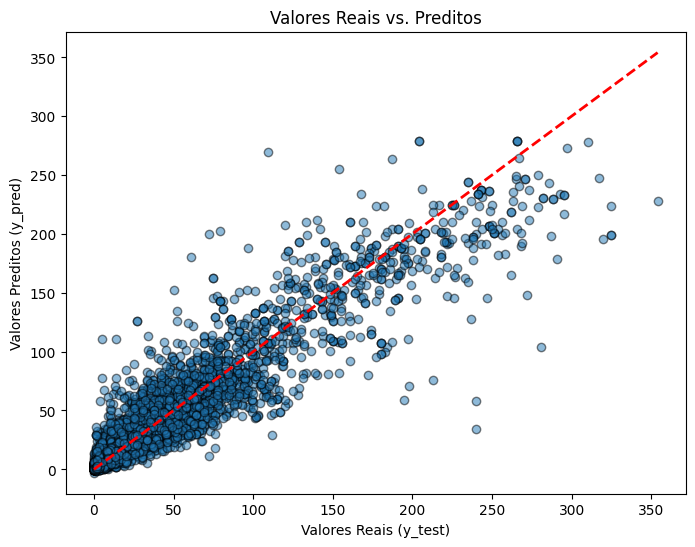

In [13]:
resultado(random_search_1, y_c_test)


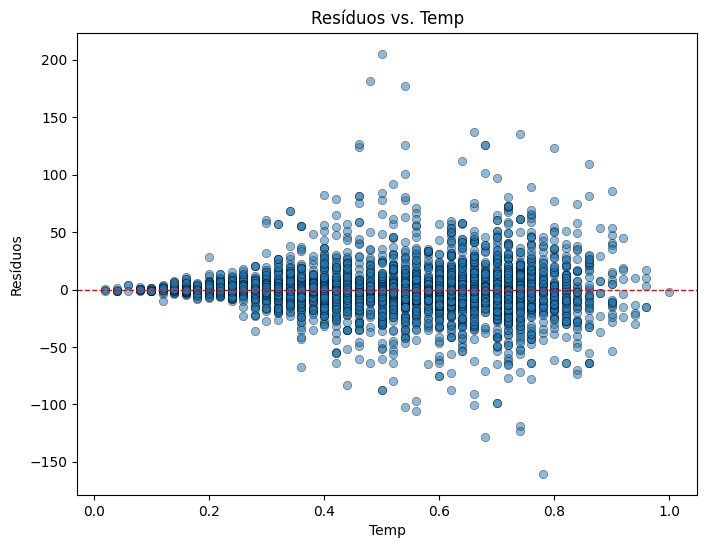

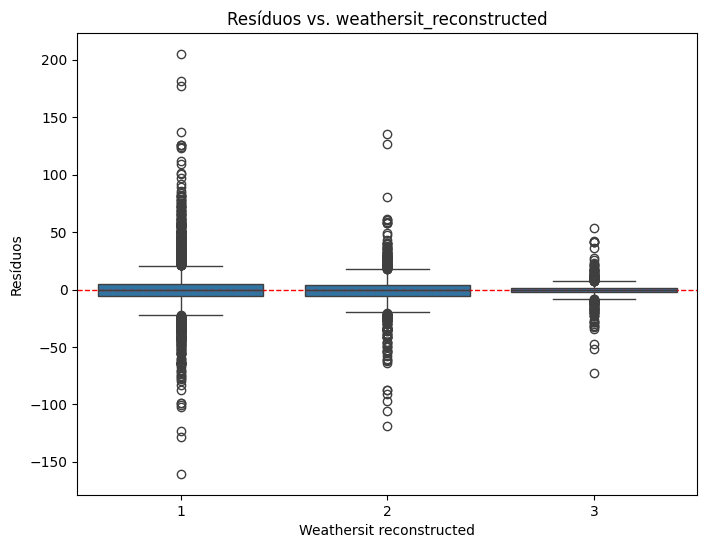

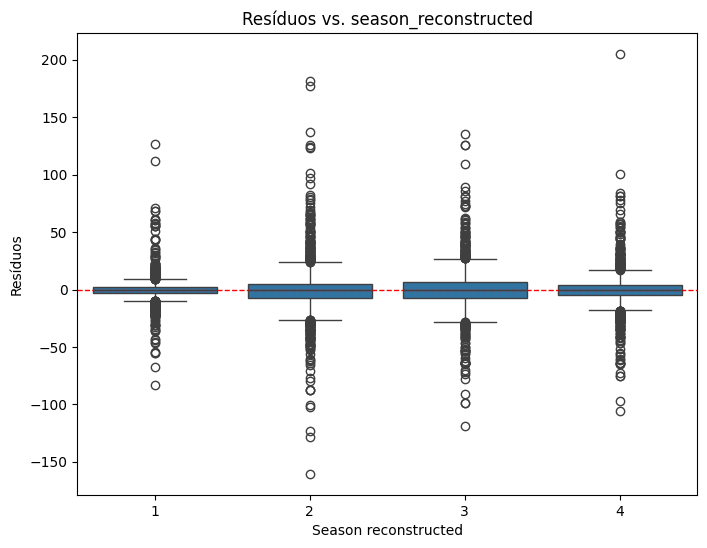

In [29]:
residuos(random_search_1, y_c_test)

Mean Squared Error (MSE): 3155.0797554320734
Root Mean Squared Error (RMSE): 56.17009663007598
Mean Absolute Error (MAE): 36.52716548317357
R-squared (R²): 0.8420883417129517


c:\Users\laraj\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


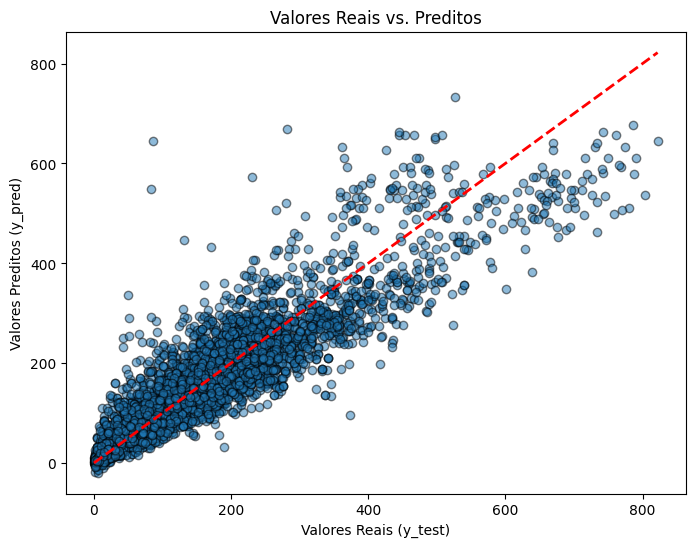

In [15]:
resultado(random_search_2, y_r_test)

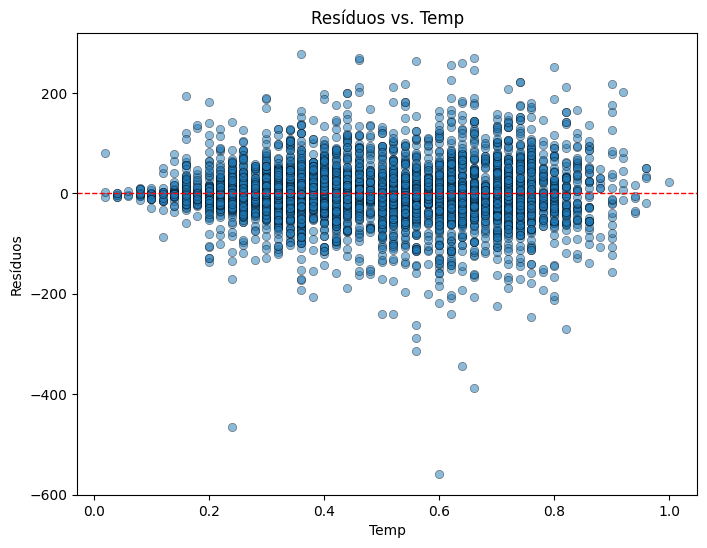

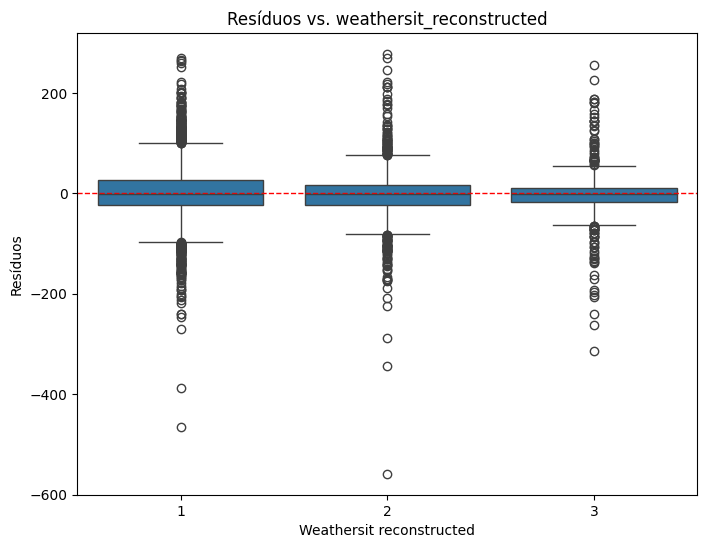

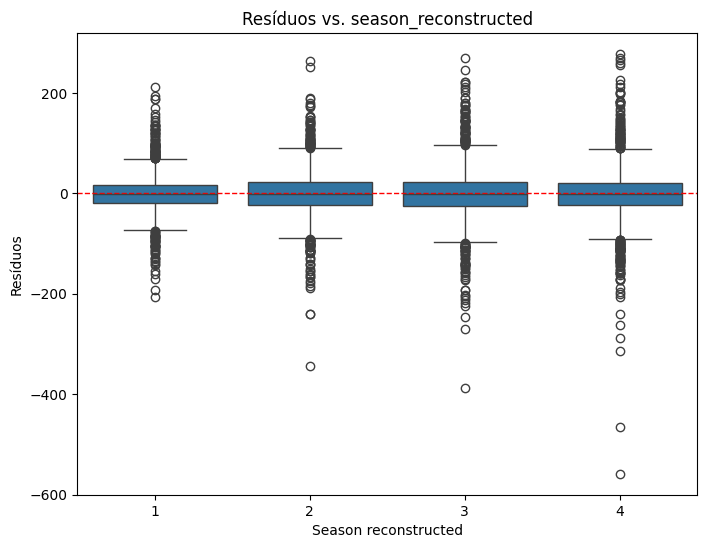

In [30]:
residuos(random_search_2, y_r_test)